In [12]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

Загрузка данных и получение основной информации

In [13]:
data = pd.read_csv('C:/Users/Nastya/Desktop/data_analyse/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv', encoding="cp1251")
print(data.shape)
print(data.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


Обработка пустых значений, заменяем их средним

In [14]:
data = data.fillna(data.mean())
print(data)

             ID  DemAffl  DemAge  DemCluster DemClusterGroup DemGender  \
0           140     10.0    76.0        16.0               C         U   
1           620      4.0    49.0        35.0               D         U   
2           868      5.0    70.0        27.0               D         F   
3          1120     10.0    65.0        51.0               F         M   
4          2313     11.0    68.0         4.0               A         F   
...         ...      ...     ...         ...             ...       ...   
22218  52834058     13.0    65.0         9.0               B         F   
22219  52834376     15.0    73.0        34.0               D         U   
22220  52837057      9.0    70.0        15.0               B         F   
22221  52838096     11.0    66.0         8.0               B         F   
22222  52856469      3.0    75.0        53.0               F       NaN   

           DemReg      DemTVReg PromClass  PromSpend  PromTime  TargetBuy  \
0        Midlands  Wales & West   

Выбор количественных столбцов

In [15]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=data.values[::,11]
y=y.astype('int')

Обучение решающего дерева с параметрами max_depth=4, random_state=0

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [17]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Визуализация

In [18]:
from sklearn.tree import export_graphviz

import subprocess


export_graphviz(tree, out_file='C:/Users/Nastya/Desktop/data_analyse/Organics_tree.dot', 
               rounded = True, proportion = False, 
                precision = 2, filled = True)

import pydot 
(graph, ) = pydot.graph_from_dot_file('C:/Users/Nastya/Desktop/data_analyse/Organics_tree.dot')

graph.write_png('C:/Users/Nastya/Desktop/data_analyse/Organics_tree.png')


Определение точности модели на обучающей выборке

In [19]:
tree.score(X_train, y_train)

0.8032270506556956

Определение точности на тестовой выборке

In [20]:
tree.score(X_test,y_test) 

0.8042597870106495

Обучение решающего дерева с параметрами max_depth=4, criterion = entropy, min_samples_leaf = 2, random_state=0

In [24]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=data.values[::,11]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree=DecisionTreeClassifier(max_depth=4, criterion = "entropy", min_samples_leaf = 2, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

Определение точности

In [26]:
print("training sample", tree.score(X_train, y_train))
print("test sample", tree.score(X_test, y_test))

training sample 0.8008485471843662
test sample 0.8029098545072746


Обучение решающего дерева с параметрами max_depth=6, min_samples_leaf = 1, random_state=1

In [27]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=data.values[::,11]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree=DecisionTreeClassifier(max_depth=6,  min_samples_leaf = 1, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

Определение точности

In [28]:
print("training sample", tree.score(X_train, y_train))
print("test sample", tree.score(X_test, y_test))

training sample 0.8082411931087683
test sample 0.7975101244937753


Обучение решающего дерева с параметрами max_depth=5, criterion = entropy

In [29]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=data.values[::,11]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree=DecisionTreeClassifier(max_depth=5, criterion = "entropy")
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Определение точности

In [30]:
print("training sample", tree.score(X_train, y_train))
print("test sample", tree.score(X_test, y_test))

training sample 0.8045127282077655
test sample 0.8011099445027748


Визуализация разделающей поверхности

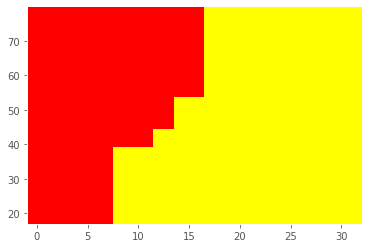

In [31]:
def get_grid(data):
    x_min, x_max = data.iloc[:, 0].min() - 1, data.iloc[:, 0].max() + 1
    y_min, y_max = data.iloc[:, 1].min() - 1, data.iloc[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

x = data[['DemAffl', 'DemAge']]
y = data.values[::,11]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)
y_train = y_train.astype(int)

tree.fit(X_train, y_train)


xx, yy = get_grid(X_train)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')